# Medical Condition Analysis

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Loading the dataset
df = pd.read_csv('datasets/healthcare_dataset.csv')
# Cleaning the column names (remove spaces, special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [14]:
medical_condition = df.groupby("medical_condition").size()
medical_condition

medical_condition
Arthritis       9308
Asthma          9185
Cancer          9227
Diabetes        9304
Hypertension    9245
Obesity         9231
dtype: int64

## 1. Medical Conditions by Insurance Provider
This section visualizes the distribution of `medical conditions` across different `insurance providers`. A horizontal bar chart is used for better readability, with bars ordered by the frequency of medical conditions. The chart includes a legend to distinguish between insurance providers and provides insights into the most common medical conditions and their associated insurance providers.

**Initial Observations:**

This is a horizontal bar chart. The y-axis lists seven different medical conditions: Arthritis, Diabetes, Hypertension, Obesity, Cancer, Asthma. The x-axis represents the "Count" of patients. For each medical condition, there are multiple horizontal bars, each colored differently to represent a specific insurance provider: Blue Cross, Medicare, Aetna, UnitedHealthcare, and Cigna. The legend on the right clarifies the color-to-provider mapping.

**Key Analytical Points:**

1. Condition Prevalence within Providers: For each medical condition, we can compare the length of the bars to see which insurance provider has the most and fewest patients with that specific condition.
    * **Arthritis:** Blue Cross and Medicare appear to have a higher count of patients with Arthritis compared to Aetna, UnitedHealthcare, and Cigna.
    * **Diabetes:** Similar to Arthritis, Blue Cross and Medicare seem to cover a larger number of diabetic patients.
    * **Hypertension:** Blue Cross and Medicare again show a higher count, with Aetna also having a substantial number of hypertensive patients. UnitedHealthcare and Cigna have comparatively fewer.
    * **Obesity:** The distribution for Obesity seems somewhat different. While Blue Cross and Medicare still have a significant number, Aetna and UnitedHealthcare also show relatively higher counts compared to their representation in other conditions. Cigna has the lowest count for Obesity.
    * **Cancer:** Medicare appears to have the highest number of cancer patients, followed by Blue Cross. Aetna, UnitedHealthcare, and Cigna have lower counts.
    * **Asthma:** Blue Cross has the highest number of asthma patients, followed by Medicare and Aetna. UnitedHealthcare and Cigna have the fewest.

2. **Provider Focus (Tentative):** We can also look at each insurance provider and see which medical conditions represent a larger proportion of their patient pool (though this chart doesn't directly show proportions). For instance, Medicare seems to have a particularly high count of patients across several chronic conditions (Arthritis, Diabetes, Hypertension, Cancer).

3. **Consistency and Variation:** There's some consistency in the ranking of providers across conditions. Blue Cross and Medicare often appear with higher patient counts, while UnitedHealthcare and Cigna tend to have lower counts for most conditions. However, Obesity shows a slightly different pattern.

**Potential Next Steps & Recommendations:**
* **Normalization/Proportional Analysis:** To get a clearer picture of each provider's focus, it's crucial to normalize these counts by the total number of patients for each insurance provider. This would show the proportion of their patient base with each condition, revealing if certain providers specialize in or disproportionately cover specific medical conditions.
* **Statistical Significance Testing:** We could investigate if the differences in the distribution of medical conditions across insurance providers are statistically significant. Chi-square tests could be used for this purpose.
* **Demographic Analysis:** Analyzing the demographics (age, gender, location) of patients within each provider and for each condition could reveal underlying factors driving these distributions.
* **Reimbursement and Coverage Models:** Understanding the reimbursement models and coverage policies of each insurance provider for these conditions might shed light on the observed patterns.
* **Market Penetration:** This data could be linked to the overall market share of each insurance provider to understand if their condition prevalence aligns with their market size.


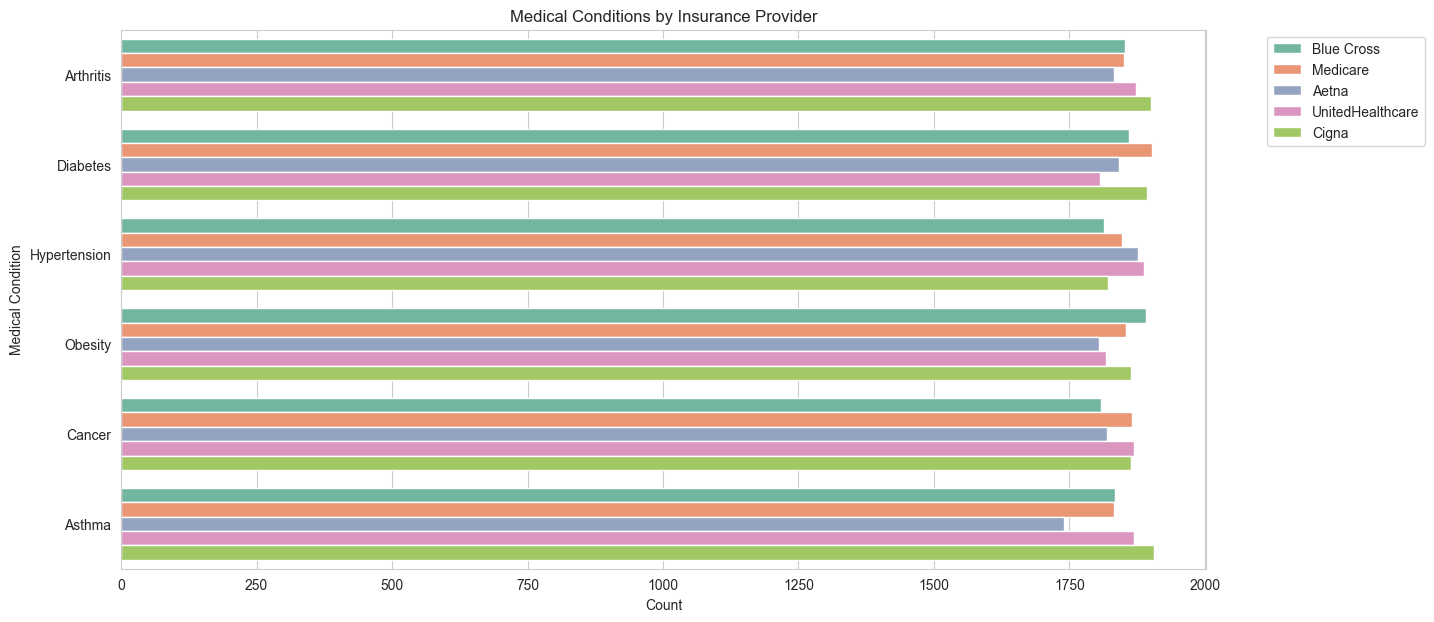

In [15]:
plt.figure(figsize=(14, 7))
sns.countplot(
    data=df, 
    # Horizontal bars for readability
    y='medical_condition',  
    hue='insurance_provider', 
    palette='Set2',
     # Order by frequency
    order=df['medical_condition'].value_counts().index 
)
plt.title('Medical Conditions by Insurance Provider')
plt.xlabel('Count')
plt.ylabel("Medical Condition")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 2. Medical Condition Count Per Year (2019–2024)

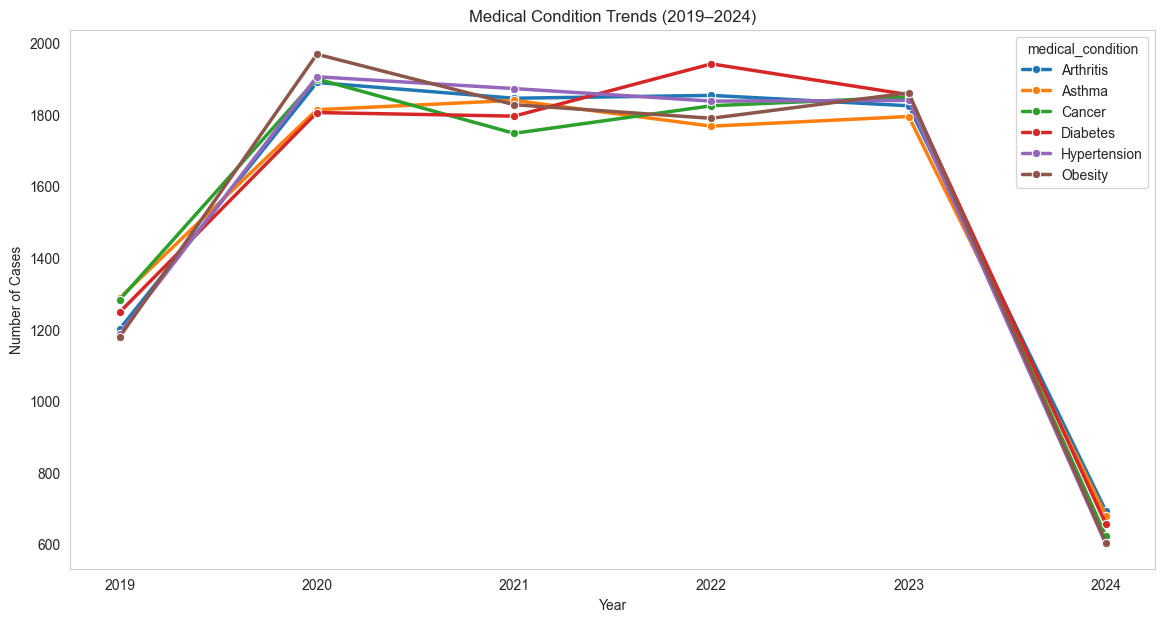

In [16]:
df['Year'] = pd.to_datetime(df['date_of_admission']).dt.year
yearly_conditions = df.groupby(['Year', 'medical_condition']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=yearly_conditions, 
    x='Year', 
    y='Count', 
    hue='medical_condition',
    marker='o',
    palette='tab10',
    linewidth=2.5
)

plt.title('Medical Condition Trends (2019–2024)')
plt.ylabel('Number of Cases')
plt.grid(True, linestyle='--')
plt.grid(False)
plt.show()

## 3. Billing Amount by Medical Condition

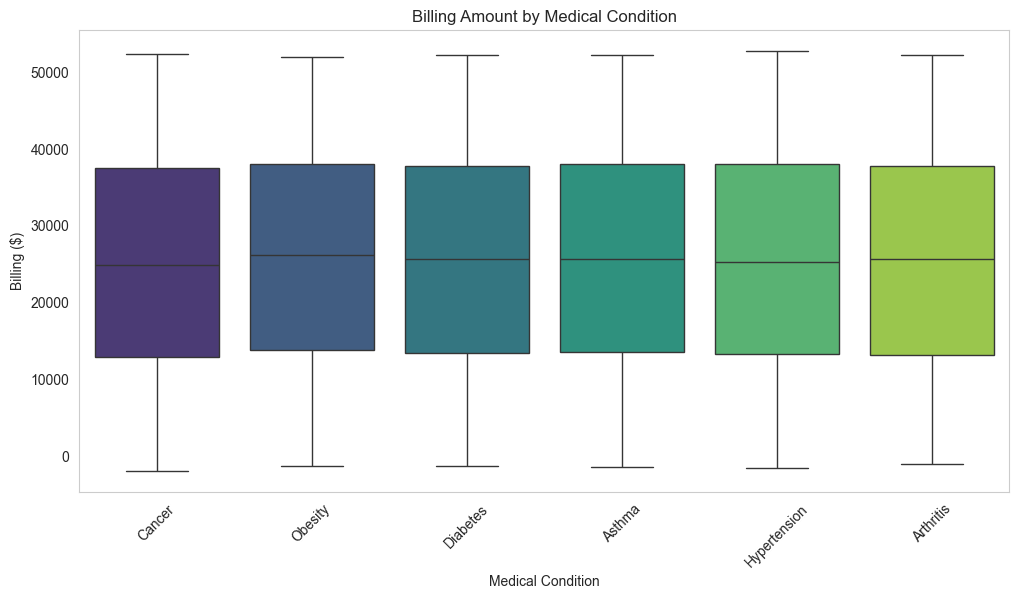

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df, 
    x='medical_condition', 
    y='billing_amount', 
    hue='medical_condition',
    palette='viridis',
    showfliers=False  # Hide outliers
)
plt.title('Billing Amount by Medical Condition')
plt.xticks(rotation=45)
plt.xlabel('Medical Condition')
plt.ylabel('Billing ($)')
plt.grid(False)
plt.show()

## 4. Average Billing Amount by Condition and Gender
**Initial Observations:**

This is a grouped bar chart. The x-axis lists six different medical conditions: Arthritis, Asthma, Cancer, Diabetes, Hypertension, and Obesity. The y-axis represents the "Average Billing ($)" amount, scaled in millions. For each medical condition, there are two adjacent bars: dark blue representing the average billing for female patients and brown representing the average billing for male patients. The exact average billing amount is labeled above each bar.

**Key Analytical Points:**
1. **Overall Average Billing:** The average billing amounts across all conditions and genders are relatively high, generally ranging between approximately $115 million and $120 million. This suggests significant healthcare costs associated with these conditions.
2. **Arthritis:** The average billing amount for females with Arthritis ($119.7 million) is slightly higher than that for males ($118.6 million).
3. **Asthma:** The average billing amount for females with Asthma ($115.5 million) is slightly lower than that for males ($119.9 million). This is a notable reversal of the trend seen in Arthritis.
4. **Cancer:** The average billing amount for females with Cancer ($116.3 million) is slightly higher than that for males ($115.9 million), although the difference is very small.
5. **Diabetes:** The average billing amount for females with Diabetes ($118.8 million) is slightly lower than that for males ($119.8 million).
6. **Hypertension:** The average billing amount for females with Hypertension ($117.4 million) is slightly lower than that for males ($118.3 million).
7. **Obesity:** The average billing amount for females with Obesity ($119.5 million) is slightly higher than that for males ($118.7 million).

**Overall Insights:**
* **Relatively Consistent Average Billing:** While there are some variations, the average billing amounts for each medical condition are generally quite similar between male and female patients. The differences observed are mostly in the range of a few hundred thousand to a little over a million dollars on average, which, while potentially significant in absolute terms, represents a small percentage difference relative to the overall high average billing.
* **No Dominant Gender Cost Driver:** There isn't a consistent pattern of one gender consistently having higher average billing across all medical conditions. The trend varies depending on the specific condition.
* **Potential Areas for Further Exploration:** Despite the relatively small differences in averages, it would be valuable to investigate the distribution of billing amounts within each gender and condition (as seen in previous box plots). This could reveal if the averages are masking significant variations or outliers that differ by gender.

**Potential Next Steps & Recommendations:**
* **Statistical Significance Testing:** To determine if these observed differences in average billing amounts between genders for each condition are statistically significant, independent samples t-tests should be performed.
* **Analysis of Variance (ANOVA):** To compare the average billing amounts across all conditions and both genders simultaneously, an ANOVA could be conducted.
* **Segmentation by Other Factors:** Analyzing the average billing amounts further by age group, admission type, or the specific types of treatments received for each condition could provide more granular insights into cost drivers.
* **Impact on Revenue:** Understanding these average billing amounts is crucial for revenue projections and financial planning. Identifying conditions or gender groups with higher average costs can inform resource allocation and pricing strategies.



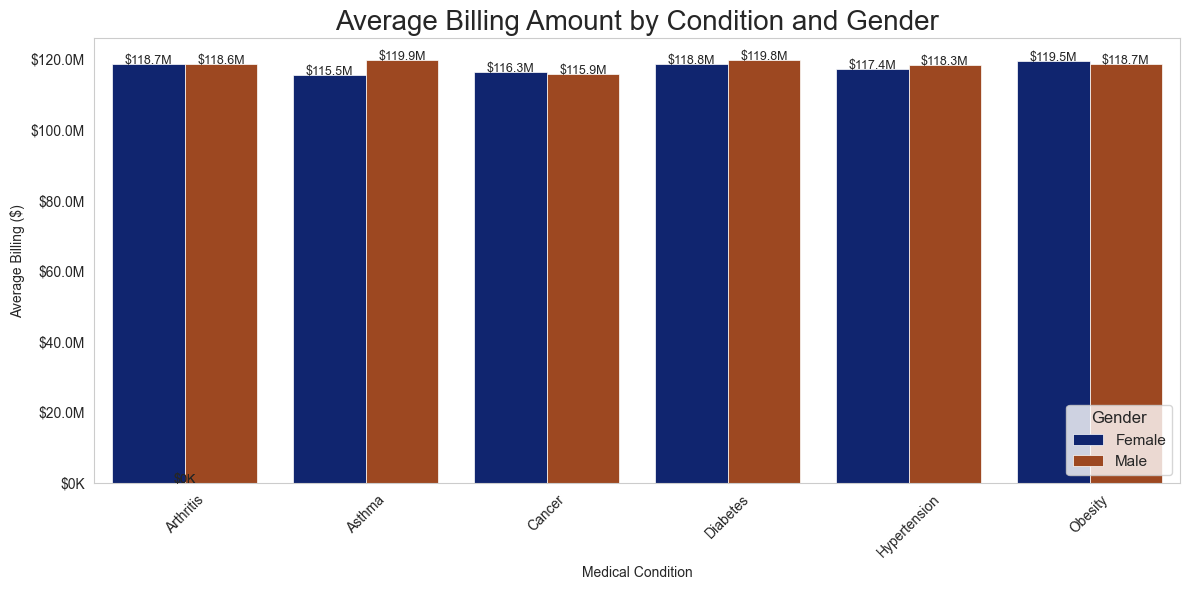


Here is the annual Billing Summary by Gender and Medical Condition (in millions $):


gender,Female,Male
medical_condition,,
Arthritis,118.7,118.6
Asthma,115.5,119.9
Cancer,116.3,115.9
Diabetes,118.8,119.8
Hypertension,117.4,118.3
Obesity,119.5,118.7


In [18]:
from matplotlib.ticker import FuncFormatter
# Group by gender and year
annual_billing = df.groupby(['gender', 'medical_condition'])['billing_amount'].sum().reset_index()
# Plot settings
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("dark")

# Creating a bar plot
ax = sns.barplot(data=annual_billing, 
                 x='medical_condition', 
                 y='billing_amount', 
                 hue='gender',
                 edgecolor='white',
                 linewidth=0.5
    )

plt.title('Average Billing Amount by Condition and Gender', fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("Medical Condition")
plt.ylabel('Average Billing ($)')
plt.legend(title='Gender')

# Formating the y-axis as currency
def currency_formatter(x, pos):
    return f"${x/1000000:,.1f}M" if x >= 1000000 else f"${x/1000:,.0f}K"
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Adjusting the legend
plt.legend(title='Gender', fontsize=11, title_fontsize=12)
# Adding the value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10000,
            f'${height/1000000:.1f}M' if height >= 1000000 else f'${height/1000:,.0f}K',
            ha="center", fontsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()

print("\nHere is the annual Billing Summary by Gender and Medical Condition (in millions $):")
summary_table = annual_billing.pivot_table(index='medical_condition', columns='gender', values='billing_amount')/1000000
summary_table.round(1)

## 5. Admission Type by Medical Condition

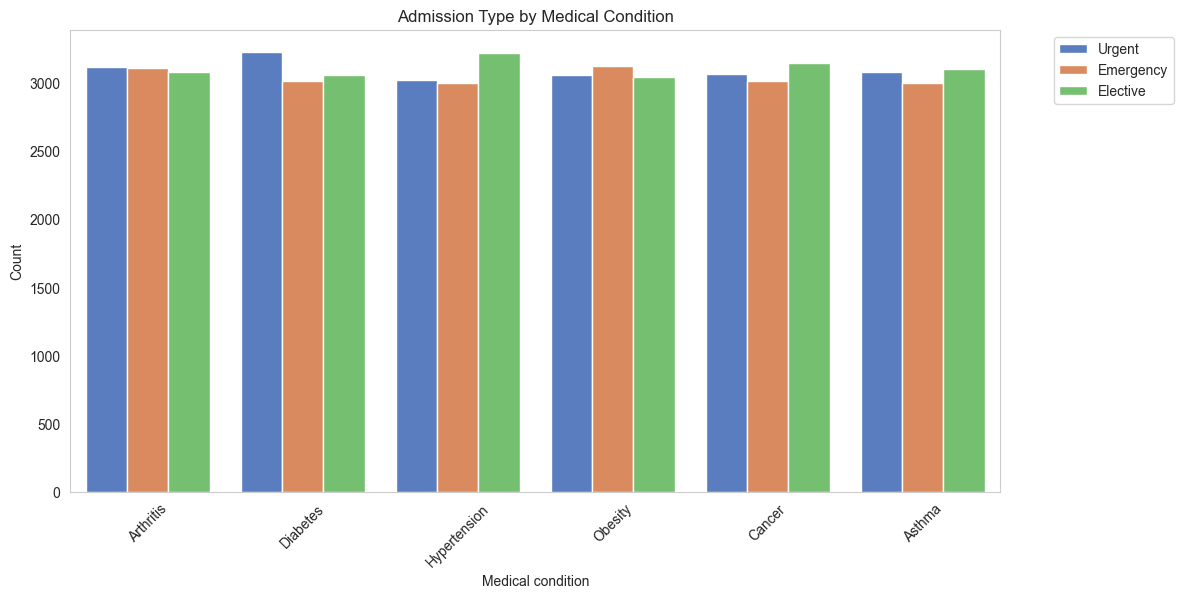

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    x='medical_condition', 
    hue='admission_type',
    palette='muted',
    order=df['medical_condition'].value_counts().index
)
plt.title('Admission Type by Medical Condition')
plt.xticks(rotation=45)
plt.xlabel('Medical condition')
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()

## 6. Medication Prescribed by Medical Condition
This section visualizes the distribution of medications prescribed for various medical conditions using a horizontal bar chart. Bars are grouped by medication type, highlighting the most commonly prescribed medications and patterns in their usage.

**Key Points:**
1. **Medication Trends:** Identify medications predominantly prescribed for specific conditions like Arthritis or Diabetes.
2. **Condition-Specific Usage:** Understand treatment strategies and medication prevalence for each condition.
3. **Medication Diversity:** Highlight conditions with varied medications, indicating complex treatment protocols.



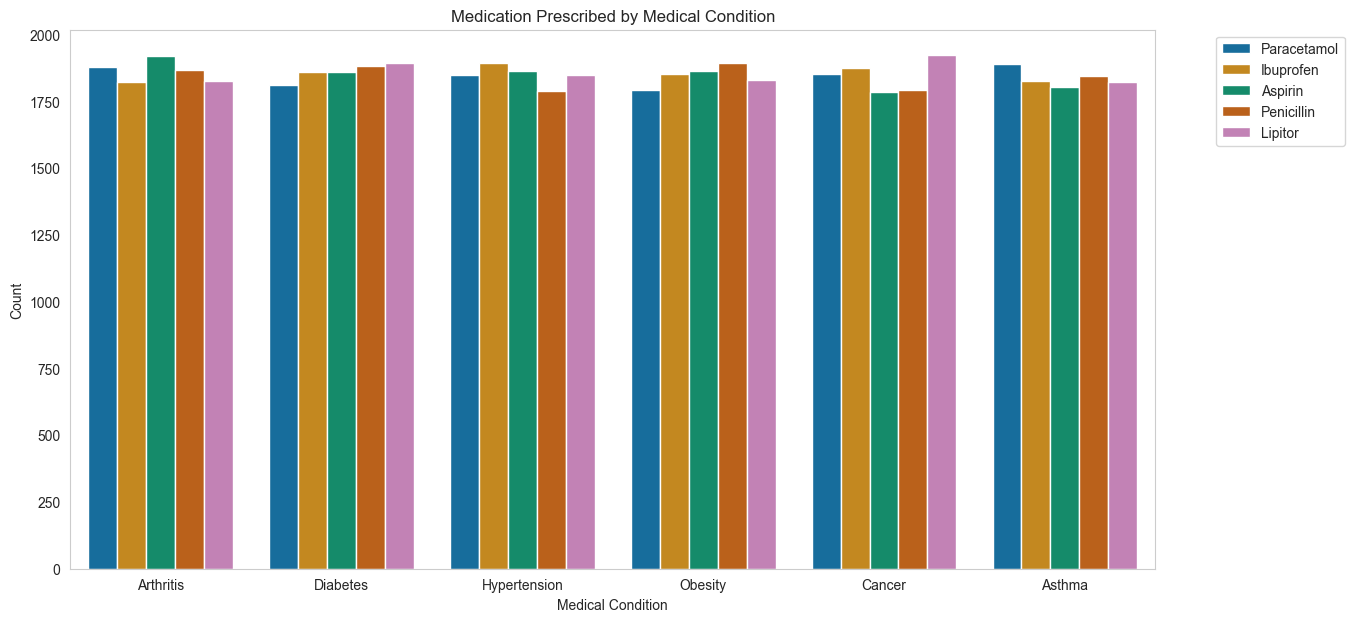

In [20]:
plt.figure(figsize=(14, 7))
sns.countplot(
    data=df, 
    x='medical_condition',  
    # Horizontal bars
    # y= "medical_condition"
    hue='medication',
    palette='colorblind',
    order=df['medical_condition'].value_counts().index
)
plt.title('Medication Prescribed by Medical Condition')
plt.xlabel('Count')
plt.ylabel("Count")
plt.xlabel("Medical Condition")
plt.grid(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 7. Test Results by Medical Condition

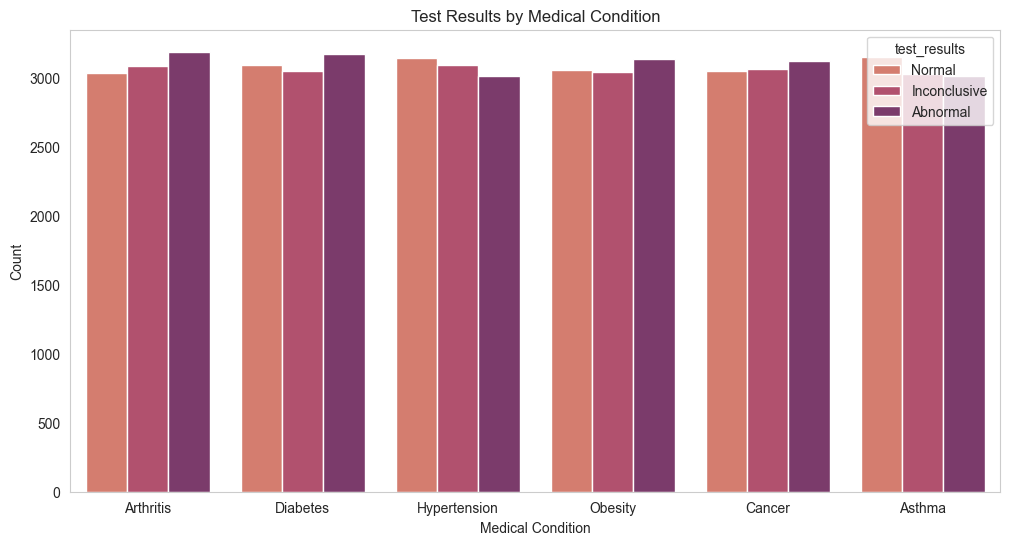

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    x='medical_condition', 
    hue='test_results',
    palette='flare',
    order=df['medical_condition'].value_counts().index
)
plt.title('Test Results by Medical Condition')
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.grid(False)
plt.show()